## Machine Learning -Module 07 - 2/25/2025


- Author: [Nathan Sloss](https://github.com/nwn8)
- Repository: [datafun-06-eda](https://github.com/nwn8/datafun-07-ml)

## Part 1 - Chart a Straight Line

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [190]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
temps_df.head(10)


,Fahrenheit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44
5,50,10.00
6,60,15.56
7,70,21.11
8,80,26.67
9,90,32.22


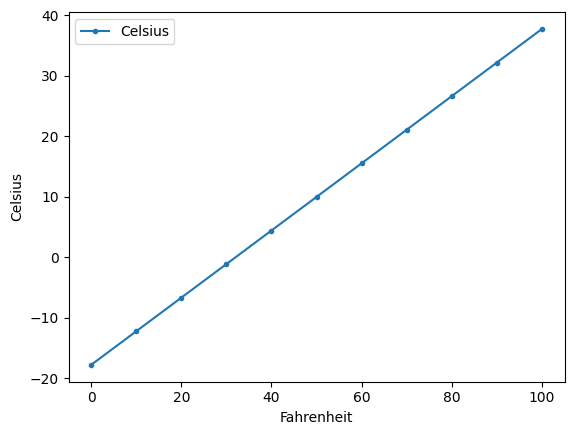

In [191]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## 2. Part 2 - Prediction

### Section 1 - Data Acquisition

In [192]:
nyc_df= pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [193]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [194]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [195]:
nyc_df2=nyc_df[['Date', 'Value']].copy()
nyc_df2.columns= ['Date', 'Temperature']
nyc_df2.Date=nyc_df2.Date.floordiv(100)
nyc_df2.head()

,Date,Temperature
0,1895,34.2
1,1896,34.7
2,1897,35.5
3,1898,39.6
4,1899,36.4


### Section 4 - Descriptive Statistics

In [196]:
pd.set_option('display.precision', 2)

In [197]:
nyc_df2.describe()

,Date,Temperature
count,124.00,124.00
mean,1956.50,37.60
std,35.94,4.54
min,1895.00,26.10
25%,1925.75,34.58
50%,1956.50,37.60
75%,1987.25,40.60
max,2018.00,47.60


### Section 5 - Build the Model

In [198]:
linear_regression = stats.linregress(x=nyc_df2.Date,
                                     y=nyc_df2.Temperature)

In [199]:
linear_regression.slope

np.float64(0.014771361132966163)

In [200]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

The data only runs through 2018.  To predict the average high temperature in January 2024 use the equation temperature = slope * year + intercept

In [201]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

In [202]:
sns.set_style('whitegrid')

(10.0, 70.0)

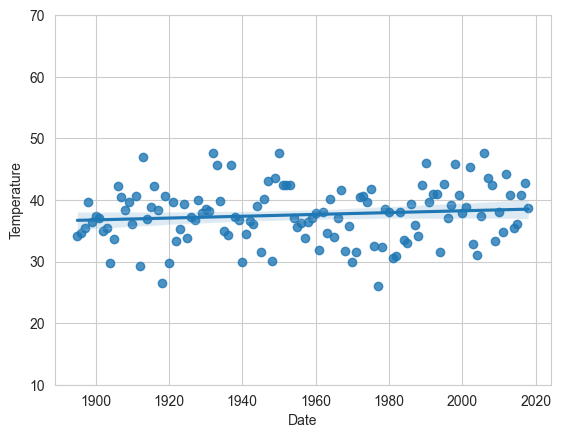

In [203]:
axes = sns.regplot(x=nyc_df2.Date, y=nyc_df2.Temperature)

axes.set_ylim(10, 70)